In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

In [2]:
#Loading the dataset
data=pd.read_csv(r'C:\Users\Csp\Downloads\avocado.csv')

#Displaying top of dataset
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
# Checking for shape of dataset

data.shape

(18249, 14)

In [5]:
#Checking for datatypes
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
## So converting date datatype from object type to date
#Pre-processing
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [7]:
##Checking fro dataset after preprocessing date attribute

data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [8]:
## Dropping unnamed attribute as it resembles same as that of index.
#Cleaning data
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
## Statistical Summary
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [10]:
# Checking for null values in the system

data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [11]:
data.apply(lambda x: len(x.unique()))

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [12]:
## Checking for Unique values in attribute type, year and region

print(data['type'].value_counts())
print(data['year'].value_counts())
print(data['region'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64
Syracuse               338
GreatLakes             338
Louisville             338
NorthernNewEngland     338
BaltimoreWashington    338
SanFrancisco           338
Chicago                338
California             338
Roanoke                338
RaleighGreensboro      338
Indianapolis           338
SouthCentral           338
NewOrleansMobile       338
BuffaloRochester       338
Pittsburgh             338
Boston                 338
NewYork                338
SanDiego               338
Spokane                338
Midsouth               338
Southeast              338
DallasFtWorth          338
Houston                338
TotalUS                338
Jacksonville           338
MiamiFtLauderdale      338
Plains                 338
HartfordSpringfield    338
West                   338
SouthCarolina          338
HarrisburgScranton     338
Northeast          

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

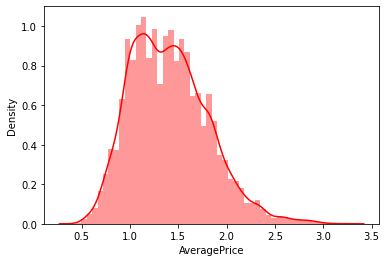

In [13]:
#Data Distribution of average price

sns.distplot(data['AveragePrice'],color='red')

conventional    9126
organic         9123
Name: type, dtype: int64
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


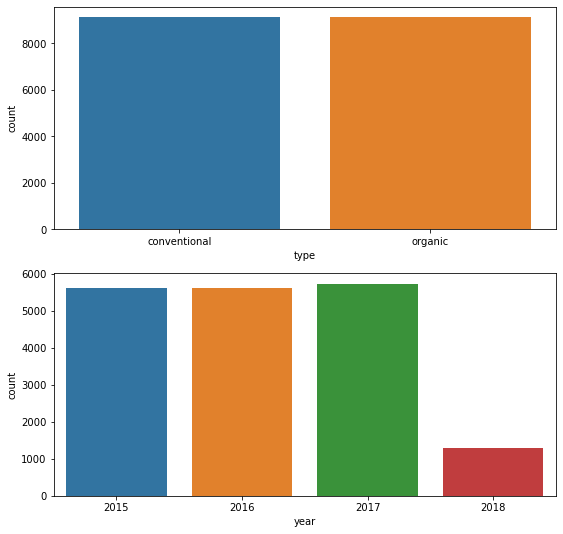

In [14]:
### Exploratory Data Ananlysis of nominal data types using count plot:
##Nominal Attributes: ['type','year','region']

plt.figure(figsize=(9,9))

plt.subplot(211)
sns.countplot(data['type'])
print(data['type'].value_counts())

plt.subplot(212)
sns.countplot(data['year'])
print(data['year'].value_counts())


Text(0.5, 1.0, 'Comaprison of Average Price wrt year')

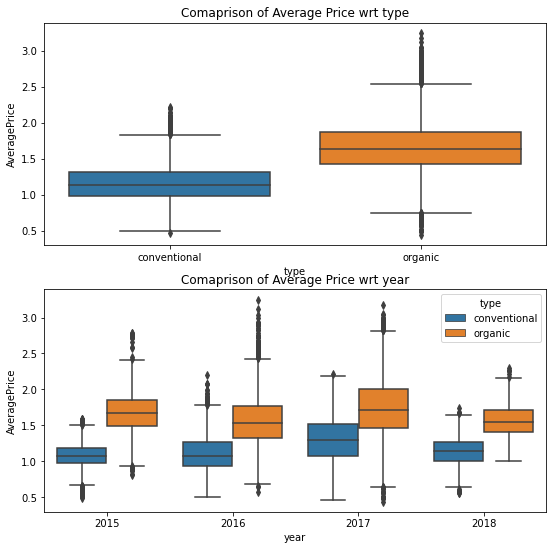

In [15]:
### Visualization of AveragePrice wrt to type and year

plt.figure(figsize=(9,9))
plt.subplot(211)
sns.boxplot(y='AveragePrice',x='type',data=data)
plt.title('Comaprison of Average Price wrt type')

plt.subplot(212)
sns.boxplot(x='year',y='AveragePrice',hue='type',data=data)
plt.title('Comaprison of Average Price wrt year')



Text(0.5, 1.0, 'Comaprison of Average Price over months')

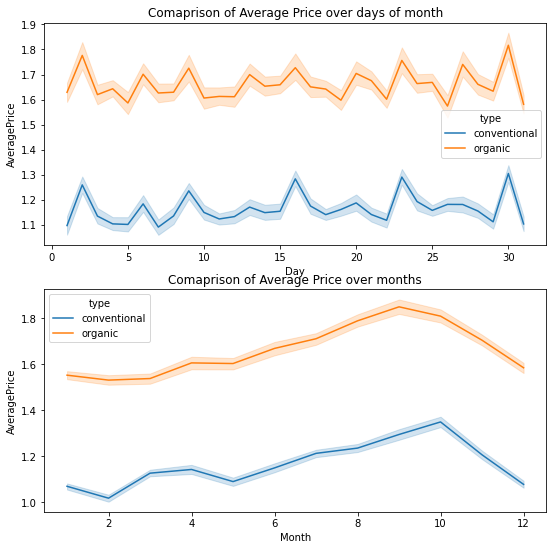

In [16]:
## Visualization of Average prive wrt to day and month

plt.figure(figsize=(9,9))

plt.subplot(211)
sns.lineplot(x='Day',y='AveragePrice',hue='type',data=data)
plt.title('Comaprison of Average Price over days of month')

plt.subplot(212)
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=data)
plt.title('Comaprison of Average Price over months')

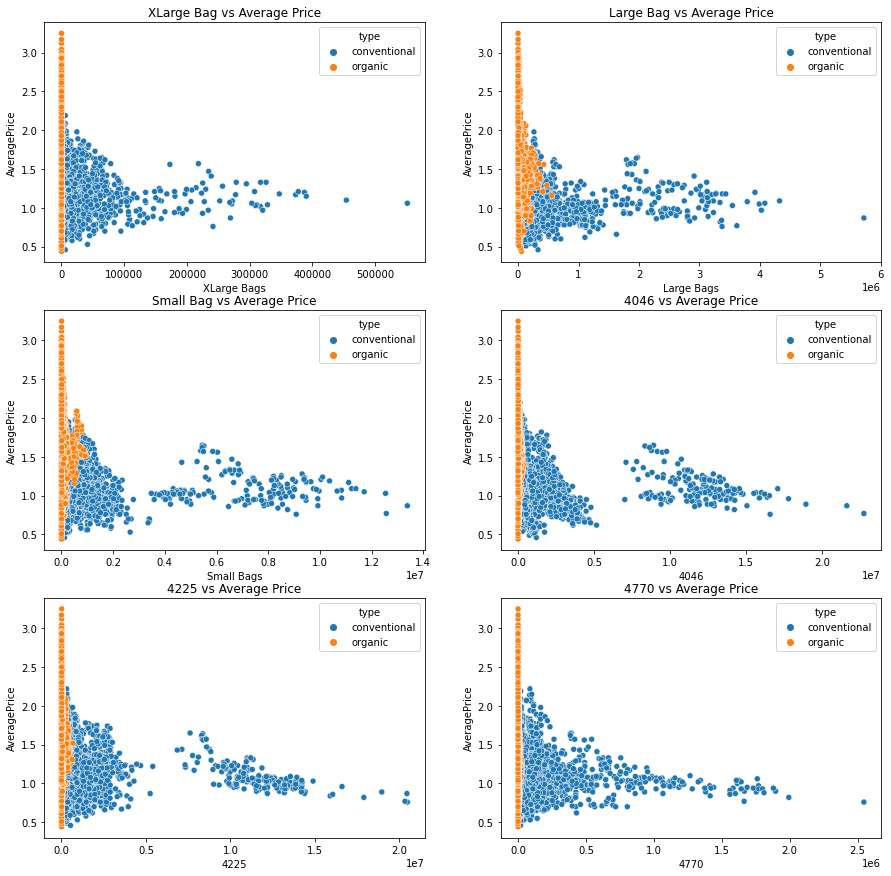

In [17]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sns.scatterplot(x='XLarge Bags',y='AveragePrice',hue='type',data=data)
plt.title('XLarge Bag vs Average Price')

plt.subplot(322)
sns.scatterplot(x='Large Bags',y='AveragePrice',hue='type',data=data)
plt.title('Large Bag vs Average Price')

plt.subplot(323)
sns.scatterplot(x='Small Bags',y='AveragePrice',hue='type',data=data)
plt.title('Small Bag vs Average Price')

plt.subplot(324)
sns.scatterplot(x='4046',y='AveragePrice',hue='type',data=data)
plt.title('4046 vs Average Price')


plt.subplot(325)
sns.scatterplot(x='4225',y='AveragePrice',hue='type',data=data)
plt.title('4225 vs Average Price')

plt.subplot(326)
sns.scatterplot(x='4770',y='AveragePrice',hue='type',data=data)
plt.title('4770 vs Average Price')
plt.show()

Text(0.5, 1.0, 'region wise yearly average prices')

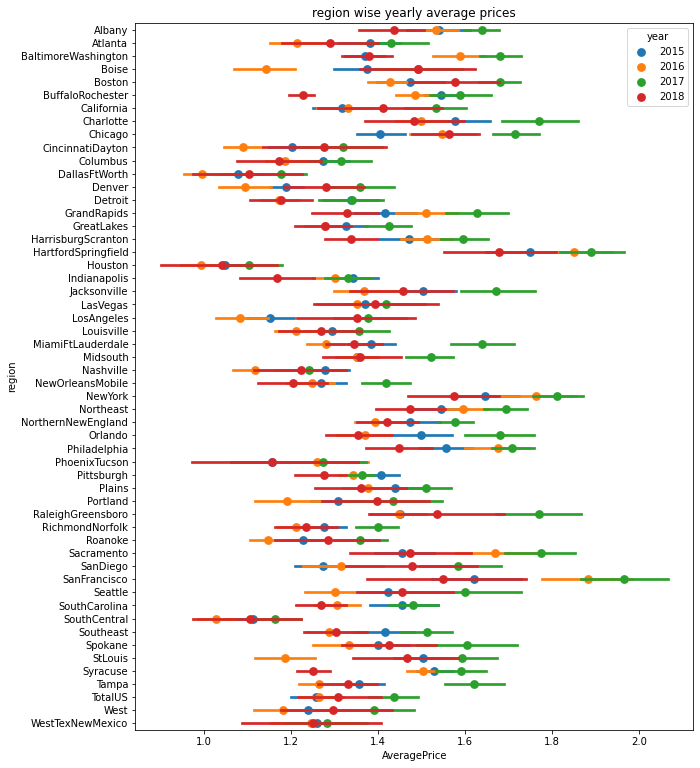

In [18]:
plt.figure(figsize=(10,13))
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)
plt.title('region wise yearly average prices')

Text(0.5, 1.0, 'region wise average prices depending on type')

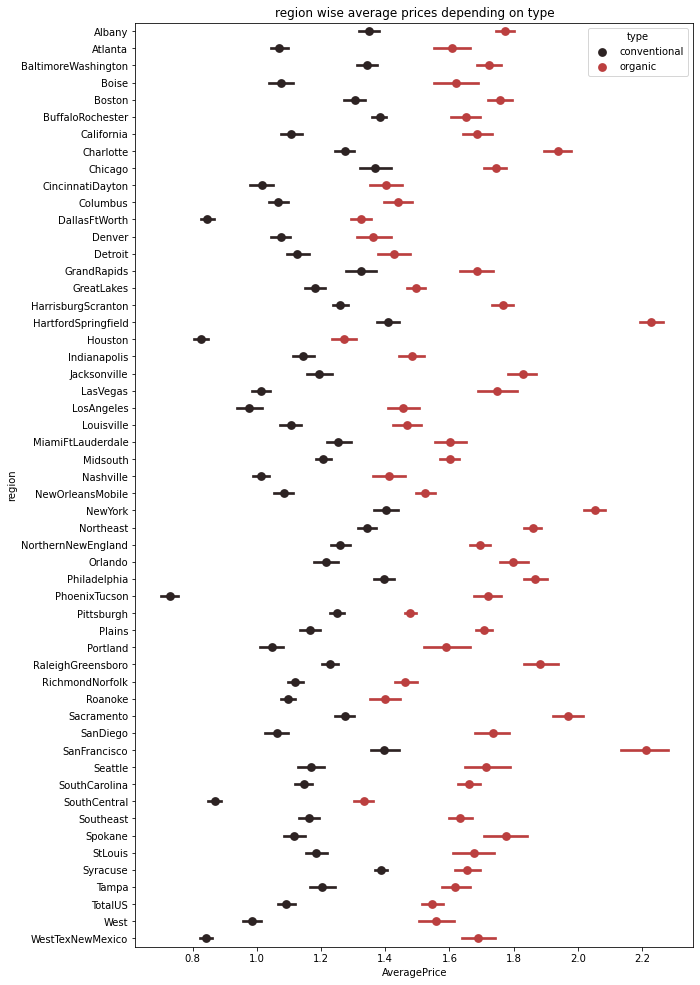

In [19]:
plt.figure(figsize=(10,17))
sns.pointplot(x='AveragePrice',y='region',data=data, hue='type',join=False, color="#bb3f3f")
plt.title('region wise average prices depending on type')

In [20]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

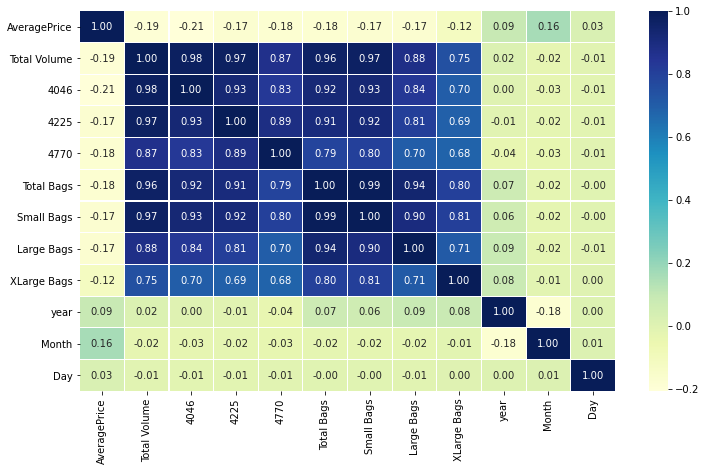

In [21]:
###Checking for correlation
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),fmt='0.2f',linewidths=0.1,linecolor='white',annot=True,cmap="YlGnBu")

In [22]:
## Correlation of target variable with other attributes

print(data.corr()['AveragePrice'].sort_values(ascending=False))

AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


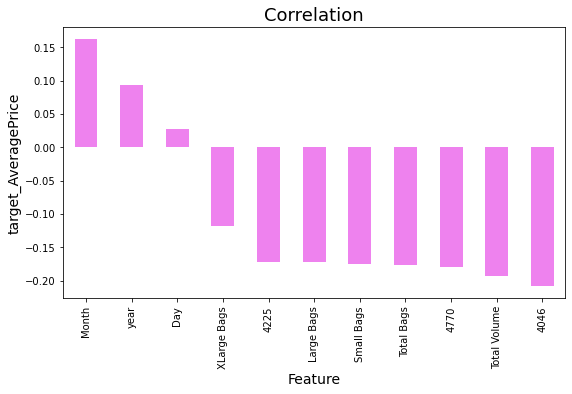

In [23]:
#Visualization of correlation of target variable with other variables
plt.figure(figsize=(9,5))
data.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='violet')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target_AveragePrice',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

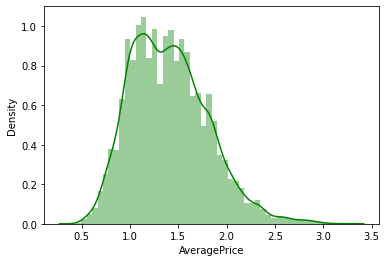

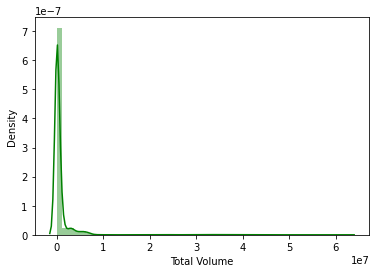

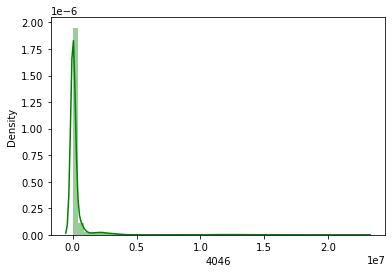

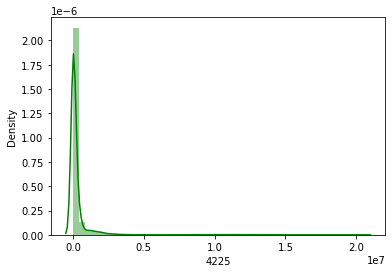

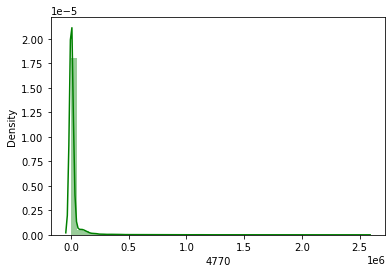

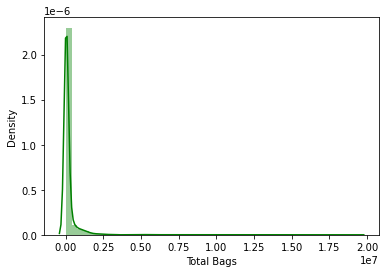

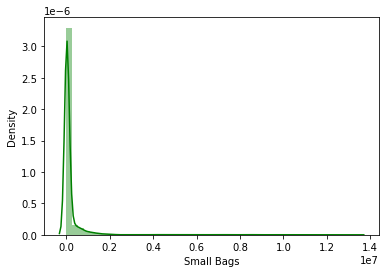

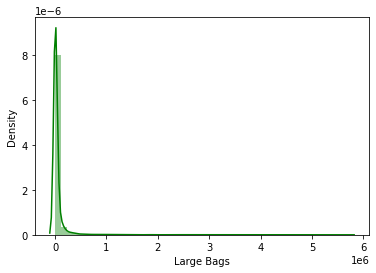

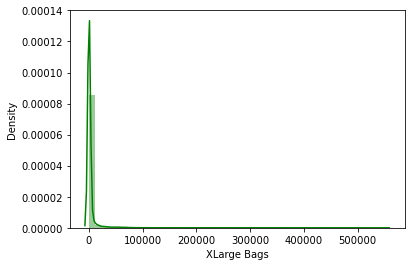

In [24]:
for i in data.columns:
    if(data[i].dtype == np.float64):
        plt.figure()
        sns.distplot(data[i],color='g')

In [25]:
### dropping attributes date as we have extracted day and month column during data preprocessing

##dropping attribute Total Volume as Total Bags   - Small Bags+Large Bags+XLarge Bags 
# & Total Volume = 4046 + 4225 + 4770 + Total Bags

data.drop(['Date','Total Volume','Total Bags'],axis=1,inplace=True)

In [26]:
## Checking for dataset after dropping attributes
data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [27]:
data.dtypes

AveragePrice    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [28]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

#applying label encoding
LE=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=LE.fit_transform(data[i])

In [29]:
## Checking for dataset after applying label encoder

data.dtypes

AveragePrice    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Large Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
XLarge Bags     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
type                  AxesSubplot(0.125,0.125;0.0945122x0.343182)
year               AxesSubplot(0.238415,0.125;0.0945122x0.343182)
region             AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Month              AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Day                AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

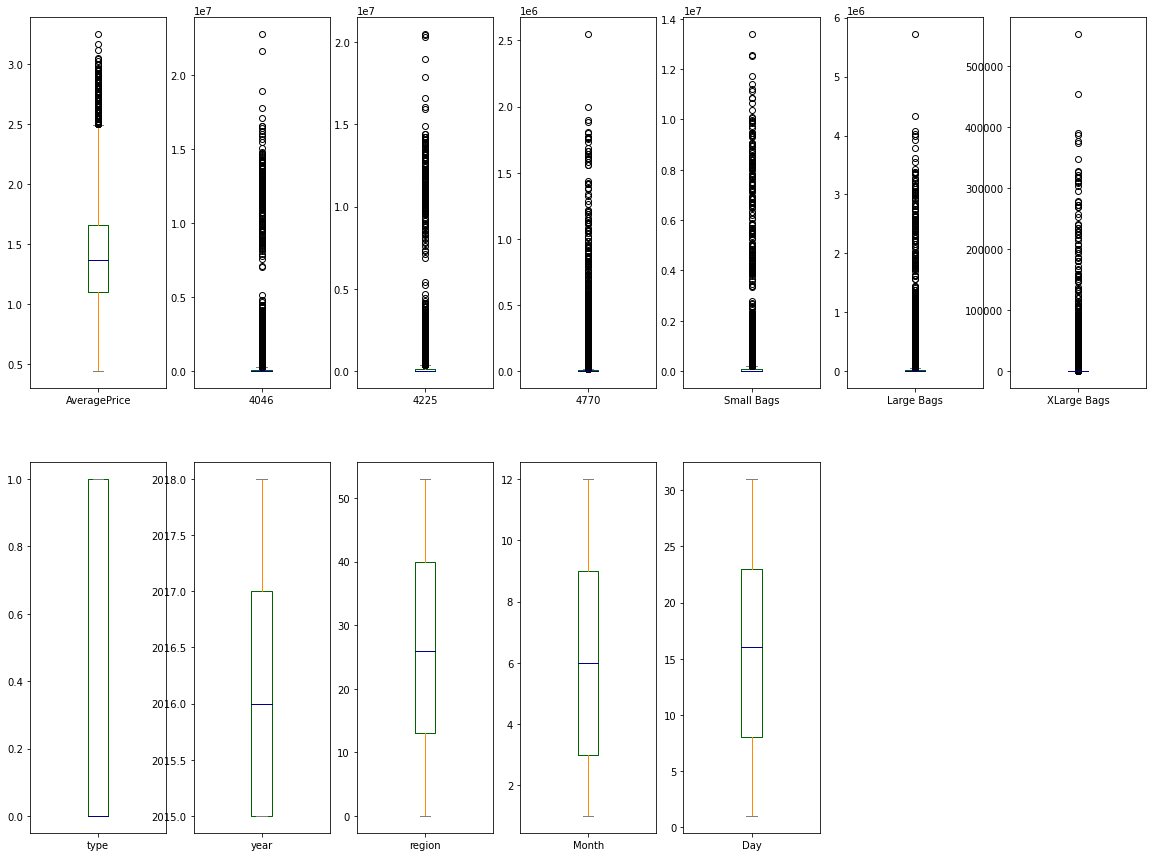

In [30]:
## Checking for outliers

color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

data.plot(kind='box',subplots=True,layout=(2,7),figsize=(20,15),color=color)


In [31]:
### Removing outliers

### Data Cleaning 

## Removing outliers

#Importing zscore from scipy.stats

from scipy.stats import zscore

z=np.abs(zscore(data))

new_data=data[(z<3).all(axis=1)] # Threshold value is +/-3

print('Shape of new data set after removing outliers:',new_data.shape)
print('Shape of data set with outliers:',data.shape)

Shape of new data set after removing outliers: (17651, 12)
Shape of data set with outliers: (18249, 12)


In [32]:
D_t=((18249-17651)/18249)*100
print('Data loss after removing outliers is :',D_t,'%')

Data loss after removing outliers is : 3.276891884486821 %


In [33]:
### Checking for skewness

new_data.skew()

AveragePrice    0.377432
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [34]:
## removing skewness for attributes having gretaer than +/-0.5 value

skew_data=('4046','4225','4770','Small Bags','Large Bags','XLarge Bags')

for data in skew_data:
    new_data[data]=np.log1p(new_data[data])

In [35]:
##skewness after applying np.log1p method

new_data.skew()

AveragePrice    0.377432
4046           -0.420273
4225           -0.604619
4770            0.068532
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [36]:
###It can be observed that XLarge Bags still has some skewness.

## Removing skewness from XLarge Bags

new_data['XLarge Bags']=np.log1p(new_data['XLarge Bags'])
new_data['XLarge Bags'].skew()


new_data['XLarge Bags']=np.sqrt(new_data['XLarge Bags'])
new_data['XLarge Bags'].skew()

new_data['XLarge Bags']=np.sqrt(new_data['XLarge Bags'])
new_data['XLarge Bags'].skew()


new_data['XLarge Bags']=np.sqrt(new_data['XLarge Bags'])
new_data['XLarge Bags'].skew()

new_data['XLarge Bags']=np.sqrt(new_data['XLarge Bags'])
new_data['XLarge Bags'].skew()


0.7530681300612153

In [37]:
new_data.skew()

AveragePrice    0.377432
4046           -0.420273
4225           -0.604619
4770            0.068532
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     0.753068
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [38]:
#Splitting the data inrto train and test

ds_x=new_data.drop(['AveragePrice'],axis=1)
y=new_data['AveragePrice']

In [39]:
#lets bring all features to a common scale

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)



x=pd.DataFrame(x,columns=ds_x.columns)
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.587318,0.431565,-0.246207,-0.215789,-0.648254,-0.692276,-1.019047,-1.210013,-1.695495,1.644612,1.289309
1,-0.719464,0.359601,-0.199437,-0.179590,-0.636520,-0.692276,-1.019047,-1.210013,-1.695495,1.644612,0.491652
2,-0.668997,0.683316,-0.001478,-0.243116,-0.621646,-0.692276,-1.019047,-1.210013,-1.695495,1.644612,-0.306004
3,-0.560308,0.532565,-0.145897,-0.384129,-0.552915,-0.692276,-1.019047,-1.210013,-1.695495,1.644612,-1.103660
4,-0.616931,0.353051,-0.135308,-0.362677,-0.449388,-0.692276,-1.019047,-1.210013,-1.695495,1.362113,1.517211


In [40]:
print('Shape of x:',x.shape)
print('Shape of y:',y.shape)

Shape of x: (17651, 11)
Shape of y: (17651,)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [43]:
#Finding out best random state

from sklearn.linear_model import  LinearRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is : ',maxAccu,'on random state :' ,maxRS)

Best Accuracy is :  0.5225444101206599 on random state : 56


In [44]:
#!pip install xgboost

In [45]:
#!pip install catboost

In [46]:
models = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
               ['SVM :', SVR()],
               ['AdaBoostClassifier :', AdaBoostRegressor()],
               ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
               ['Xgboost: ', XGBRegressor()],
               ['Lasso: ', Lasso()],
               ['Ridge: ', Ridge(random_state=6)],
               ['BayesianRidge: ', BayesianRidge()],
               ['ElasticNet: ', ElasticNet()],
               ['HuberRegressor: ', HuberRegressor()]]

In [47]:
print("Mean Square Errors---->")
print('\n')

for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Mean Square Errors---->


DecisionTree : 0.19223188257086066
RandomForest : 0.13095036311547795
KNeighbours : 0.19812606323635146
SVM : 0.17985132630619816
AdaBoostClassifier : 0.2562034123979483
GradientBoostingClassifier:  0.19394196312089496
Xgboost:  0.1281993435021398
Lasso:  0.3796873252435025
Ridge:  0.26646938383928903
BayesianRidge:  0.26646405029015047
ElasticNet:  0.3796873252435025
HuberRegressor:  0.26690048504775504


In [48]:
print("r2 Square/Accuracy Score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (r2_score(y_test, predictions))*100)

r2 Square/Accuracy Score----->


DecisionTree : 74.56526311979574
RandomForest : 88.19049852955038
KNeighbours : 72.74407223535565
SVM : 77.5402437385192
AdaBoostClassifier : 54.9347926858494
GradientBoostingClassifier:  73.88311818288228
Xgboost:  88.58832613090189
Lasso:  -0.09904835071166129
Ridge:  50.69710915865981
BayesianRidge:  50.69908279447147
ElasticNet:  -0.09904835071166129
HuberRegressor:  50.53745307666756


In [49]:
print('Cross_val_scores:')
print('\n')

names=[]
predictions=[]


for name,model in models:
    result=cross_val_score(model,x,y,cv=5,scoring='r2')
    predictions.append(result)
    names.append(name)
    result="%s : %f (%f)"%(name,result.mean(),result.std())
    print(result)

Cross_val_scores:


DecisionTree : : -0.265386 (0.427341)
RandomForest : : 0.227597 (0.292894)
KNeighbours : : -0.057177 (0.319738)
SVM : : 0.047521 (0.308579)
AdaBoostClassifier : : 0.040682 (0.467318)
GradientBoostingClassifier:  : 0.373940 (0.220393)
Xgboost:  : 0.432505 (0.241637)
Lasso:  : -1.156670 (1.370865)
Ridge:  : 0.094272 (0.266415)
BayesianRidge:  : 0.094407 (0.266365)
ElasticNet:  : -1.156670 (1.370865)
HuberRegressor:  : 0.090116 (0.262910)


In [50]:
#!pip install scikit-optimize

In [51]:
### Performing Hyper parameter tuning to increse model performance of XGBoostregressor.

from sklearn.model_selection import GridSearchCV
            
param_tuning = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
             }
#Create new XGB object
XG_2 = XGBRegressor()

#Use GridsearchCV
GCV = GridSearchCV(estimator = XG_2,param_grid = param_tuning,cv = 5,n_jobs = -1,verbose = 1)

#Fit the model
best_model = GCV.fit(x,y)

#checking for best parameters
GCV.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 0.8}

In [52]:
#Creating Final Model after hyperparameter tuning for XGBRegressor

f_mod_xgb= XGBRegressor(
        colsample_bytree = 0.6,
        max_depth = 5,
        min_child_weight = 5,
        subsample = 0.8,
        gamma=0.5)


f_mod_xgb.fit(x_train, y_train)

y_pred = f_mod_xgb.predict(x_test)

print('root mean squared error for XGBRegressor:',np.sqrt(mean_squared_error(y_test,y_pred)))

print('Model accuracy for XGBRegressor: ',r2_score(y_test, y_pred)*100)

root mean squared error for XGBRegressor: 0.15693650167716908
Model accuracy for XGBRegressor:  82.89883552535429


### After hyper parameter tuning, model accuracy with high performance is 82.89%.

In [53]:
#Saving the model for deployment
import joblib

joblib.dump(f_mod_xgb,'avacado_xgboost.obj')

['avacado_xgboost.obj']